# Customer Churn Prediction

ConnectTel is a leading telecommunications company at the forefront of innovation and connectivity solutions.

# 1. Loading Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Loading Dataset

In [16]:
df = pd.read_csv("C:\\Users\\User\Desktop\\10Alytics Project\\Customer-Churn - Customer-Churn.csv")

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The datset include the information about:
* **Customers who left within the last month** – the column is called Churn
* **Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup and device.
* **Customer account information** - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* **Demographic info about customers** – gender, age range, and if they have partners and dependents


In [18]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


# Exploratory Data Analysis

In [10]:
df.size

147903

In [4]:
df.shape

(7043, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

# Data Cleaning

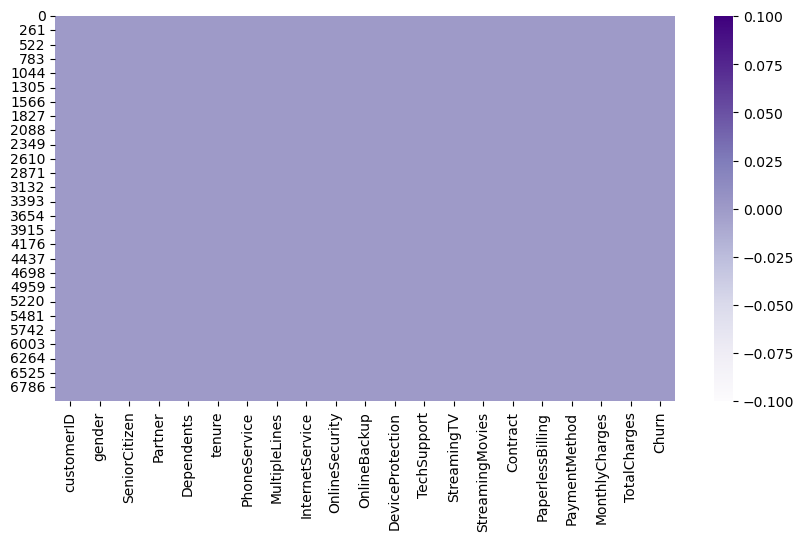

In [21]:
# Visualising missing values
plt.figure(figsize = (10,5))
sns.heatmap(data = df.isnull(), cmap = "Purples", vmin = 0, vmax =0)
plt.xticks(rotation = 90)
plt.show();

From the above visalisation, it shows that there are no missing values

In [22]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Data Manipulation

In [23]:
# Dropping Customer ID Column
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


* On deep analysis, we can find some indirect missingness in our data (which can be in form of blankspaces). Let's see

In [24]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

* Here we see that the TotalCharges has 11 missing values. Let's check this data

In [25]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


* It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.
  Let's see if there are any other 0 values in the tenure column.

In [26]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

* There are no additional missing values in the Tenure column.
Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [27]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

* To solve the problem of missing values in TotalCharges column, I decided to fill it with the mean of TotalCharges values.

In [28]:
df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Checking again for missing values

In [29]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Fantastic, there are no more missing values

In [31]:
categorical_features = ["gender",
"Partner",
"Dependents",
"PhoneService",
"MultipleLines",
"InternetService",
"OnlineSecurity", 
"OnlineBackup",
"DeviceProtection",
"TechSupport", 
"StreamingTV", 
"StreamingMovies", 
"Contract", 
"PaperlessBilling",
"PaymentMethod",]

numerical_df = ["SeniorCitizen","tenure","MonthlyCharges", "TotalCharges"]

target = "Churn"

In [32]:
numerical_df

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [34]:
numeric_data = df.select_dtypes(exclude = "object")

In [35]:
numeric_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


# Numerical Feature Distribution

In [37]:
df.skew(numeric_only = True)

SeniorCitizen     1.831103
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

In [38]:
df.corr(numeric_only =True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


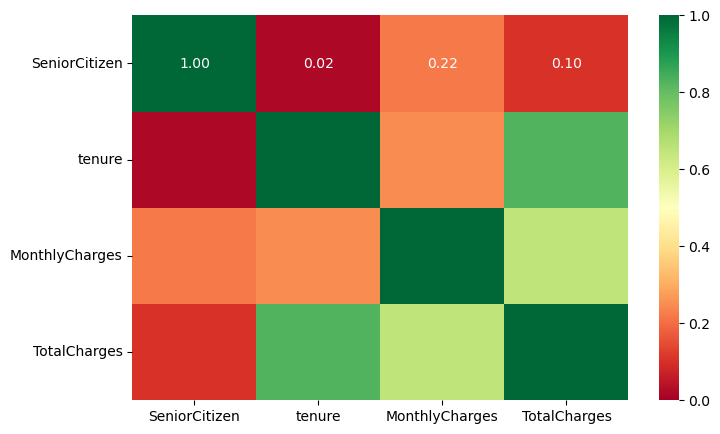

In [42]:
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(numeric_only =True), cmap = "RdYlGn", vmin = 0, vmax = 1, annot = True, fmt = ".2f");

All the numerical feature revealed positive correlation. Totalcharges with MonthlyCharges and tenure show a higher positive correlation

In [43]:
df[numerical_df].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


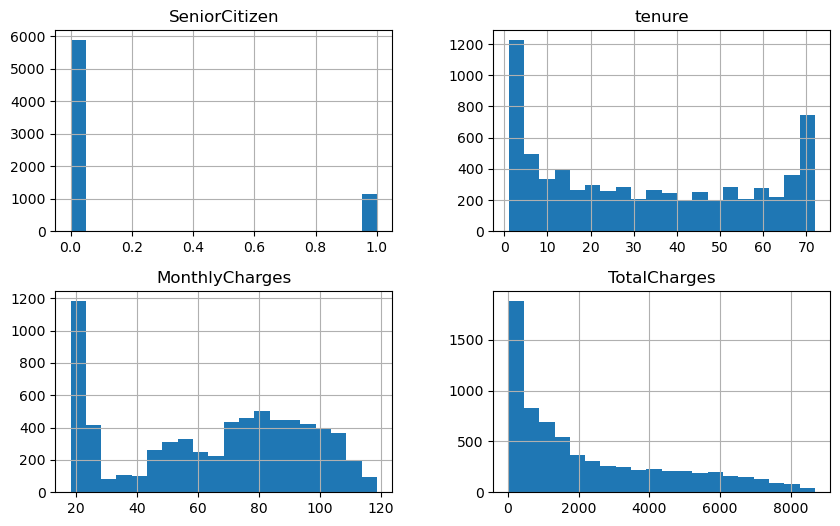

In [45]:
df[numerical_df].hist(bins = 20, figsize =(10,6));

I will look at the numerical features to target variables to observe what could have an impact on the churn rate



array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

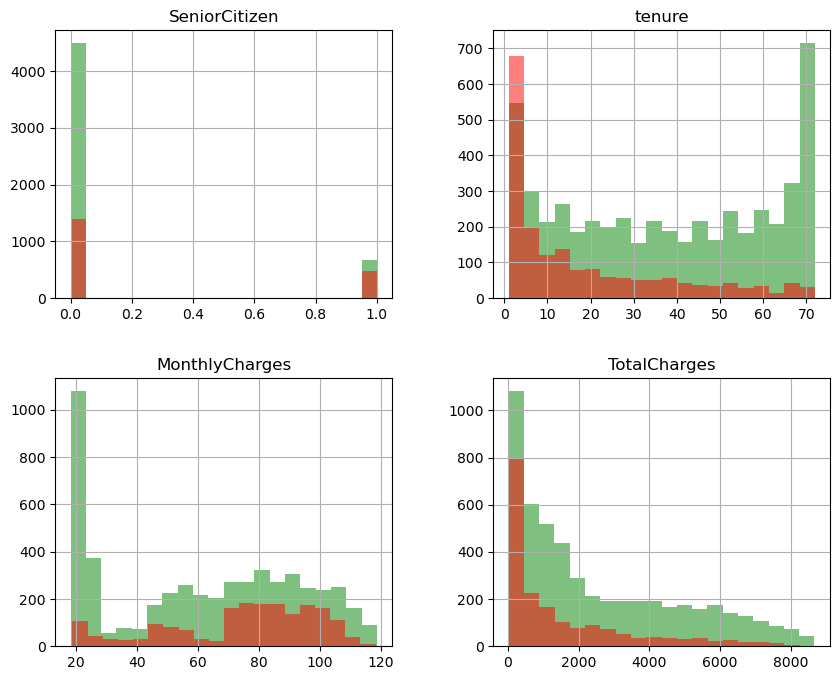

In [48]:
fig, ax = plt.subplots(nrows= 2, ncols=2, figsize = (10,8))
df[df.Churn  == "No"][numerical_df].hist(bins = 20,color ="green", alpha = 0.5, ax = ax)
df[df.Churn  == "Yes"][numerical_df].hist(bins = 20,color ="red", alpha = 0.5, ax = ax)

From the histogram above, Senior citizens are prone to churn, customers with shorter tenure are likely to churn, customers with lower monthly charges are less likely to churn, customers with low total charges whi are likely new customers have a higher churn rate

# Categorical data EDA

In [50]:
categorical_df = df.select_dtypes(include = ["object"])

In [51]:
categorical_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


The TotalCharges column keeps appearing as a categorical feature, therefore i will drop the column using a drop function.



In [52]:
categorical_df.tail()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
7042,Male,No,No,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),No


In [53]:
#checking for imbalance for churn
categorical_df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [55]:
categorical_df.head(3)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [57]:
#printing out each feature and the number of each unique content

categorical_columns = categorical_df.columns.to_list()

for feature in categorical_columns:
    print(f"{feature} ..................... {categorical_df[feature].nunique()}")

gender ..................... 2
Partner ..................... 2
Dependents ..................... 2
PhoneService ..................... 2
MultipleLines ..................... 3
InternetService ..................... 3
OnlineSecurity ..................... 3
OnlineBackup ..................... 3
DeviceProtection ..................... 3
TechSupport ..................... 3
StreamingTV ..................... 3
StreamingMovies ..................... 3
Contract ..................... 3
PaperlessBilling ..................... 2
PaymentMethod ..................... 4
Churn ..................... 2


In [58]:
for feature in categorical_columns:
    print(feature)
    print(categorical_df[feature].unique())
    print("\n")

gender
['Female' 'Male']


Partner
['Yes' 'No']


Dependents
['No' 'Yes']


PhoneService
['No' 'Yes']


MultipleLines
['No phone service' 'No' 'Yes']


InternetService
['DSL' 'Fiber optic' 'No']


OnlineSecurity
['No' 'Yes' 'No internet service']


OnlineBackup
['Yes' 'No' 'No internet service']


DeviceProtection
['No' 'Yes' 'No internet service']


TechSupport
['No' 'Yes' 'No internet service']


StreamingTV
['No' 'Yes' 'No internet service']


StreamingMovies
['No' 'Yes' 'No internet service']


Contract
['Month-to-month' 'One year' 'Two year']


PaperlessBilling
['Yes' 'No']


PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Churn
['No' 'Yes']




# Univariate Analysis

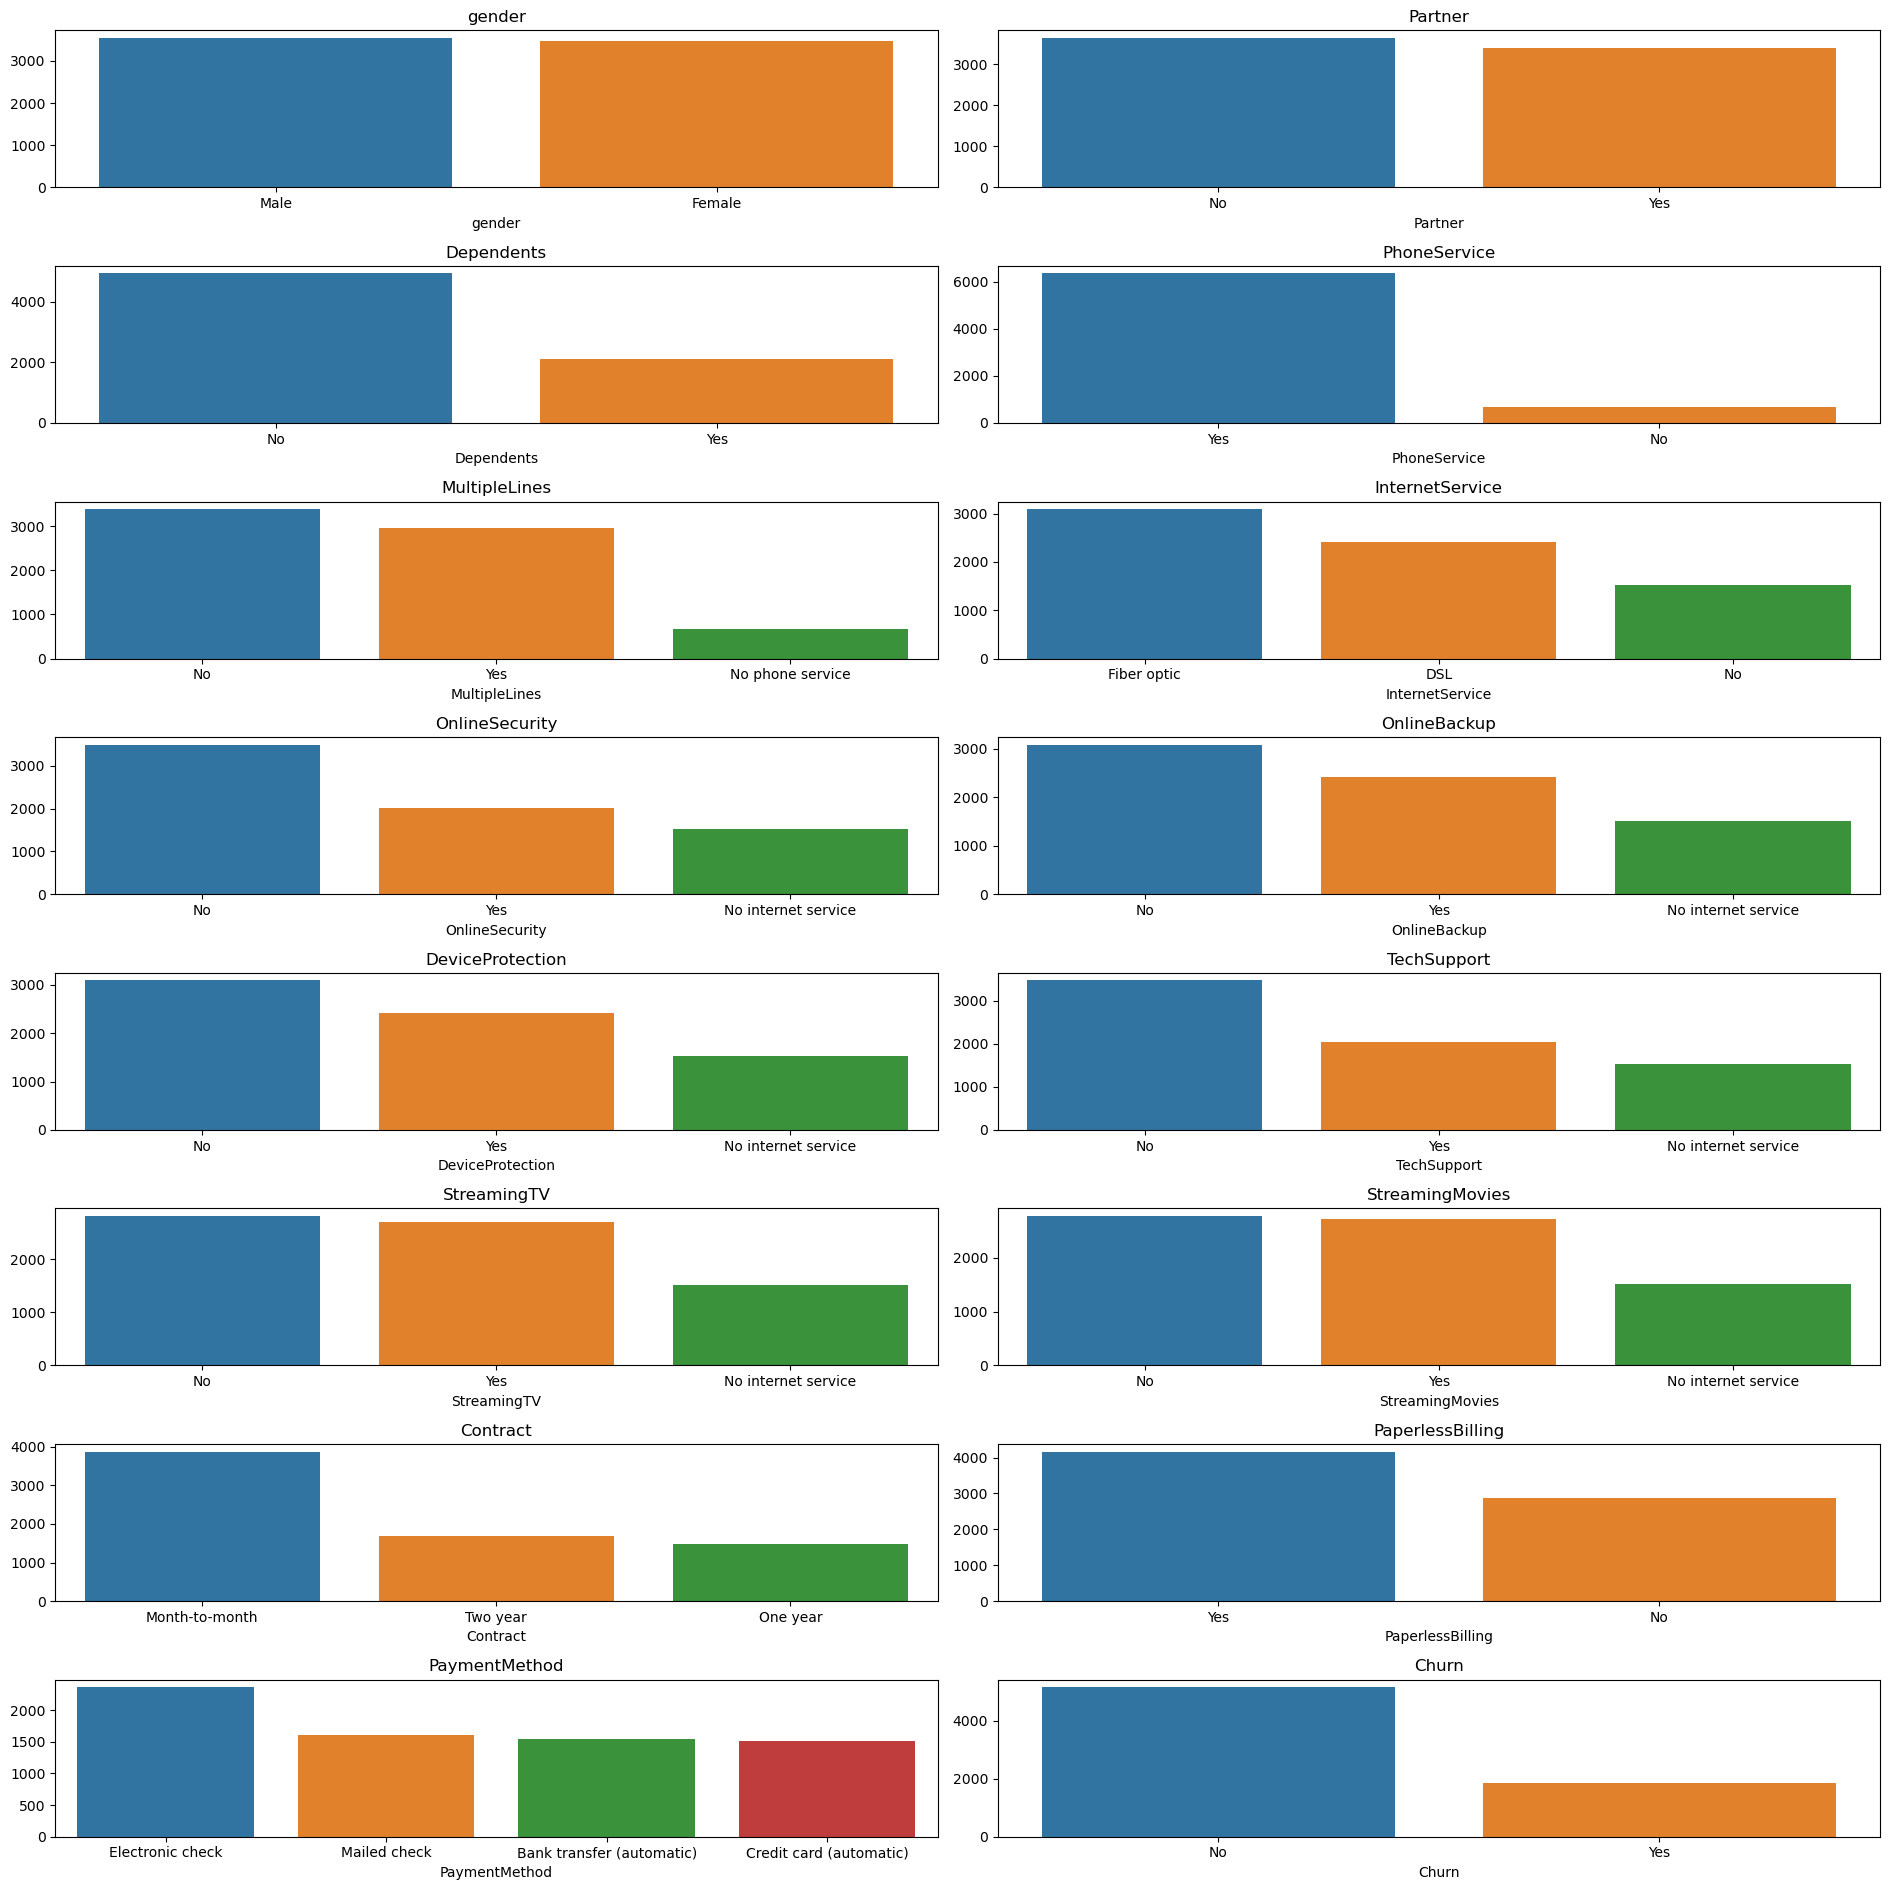

In [59]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize = (19,19))

position = axes.flatten()

for index, feature in enumerate(categorical_columns):
    sns.barplot(x = categorical_df[feature].value_counts().index, y =categorical_df[feature].value_counts().values, 
               ax = position[index])
    position[index].set_title(feature)
    
plt.tight_layout()


# Bivariate Analysis

comparing each categorical_df with the churn

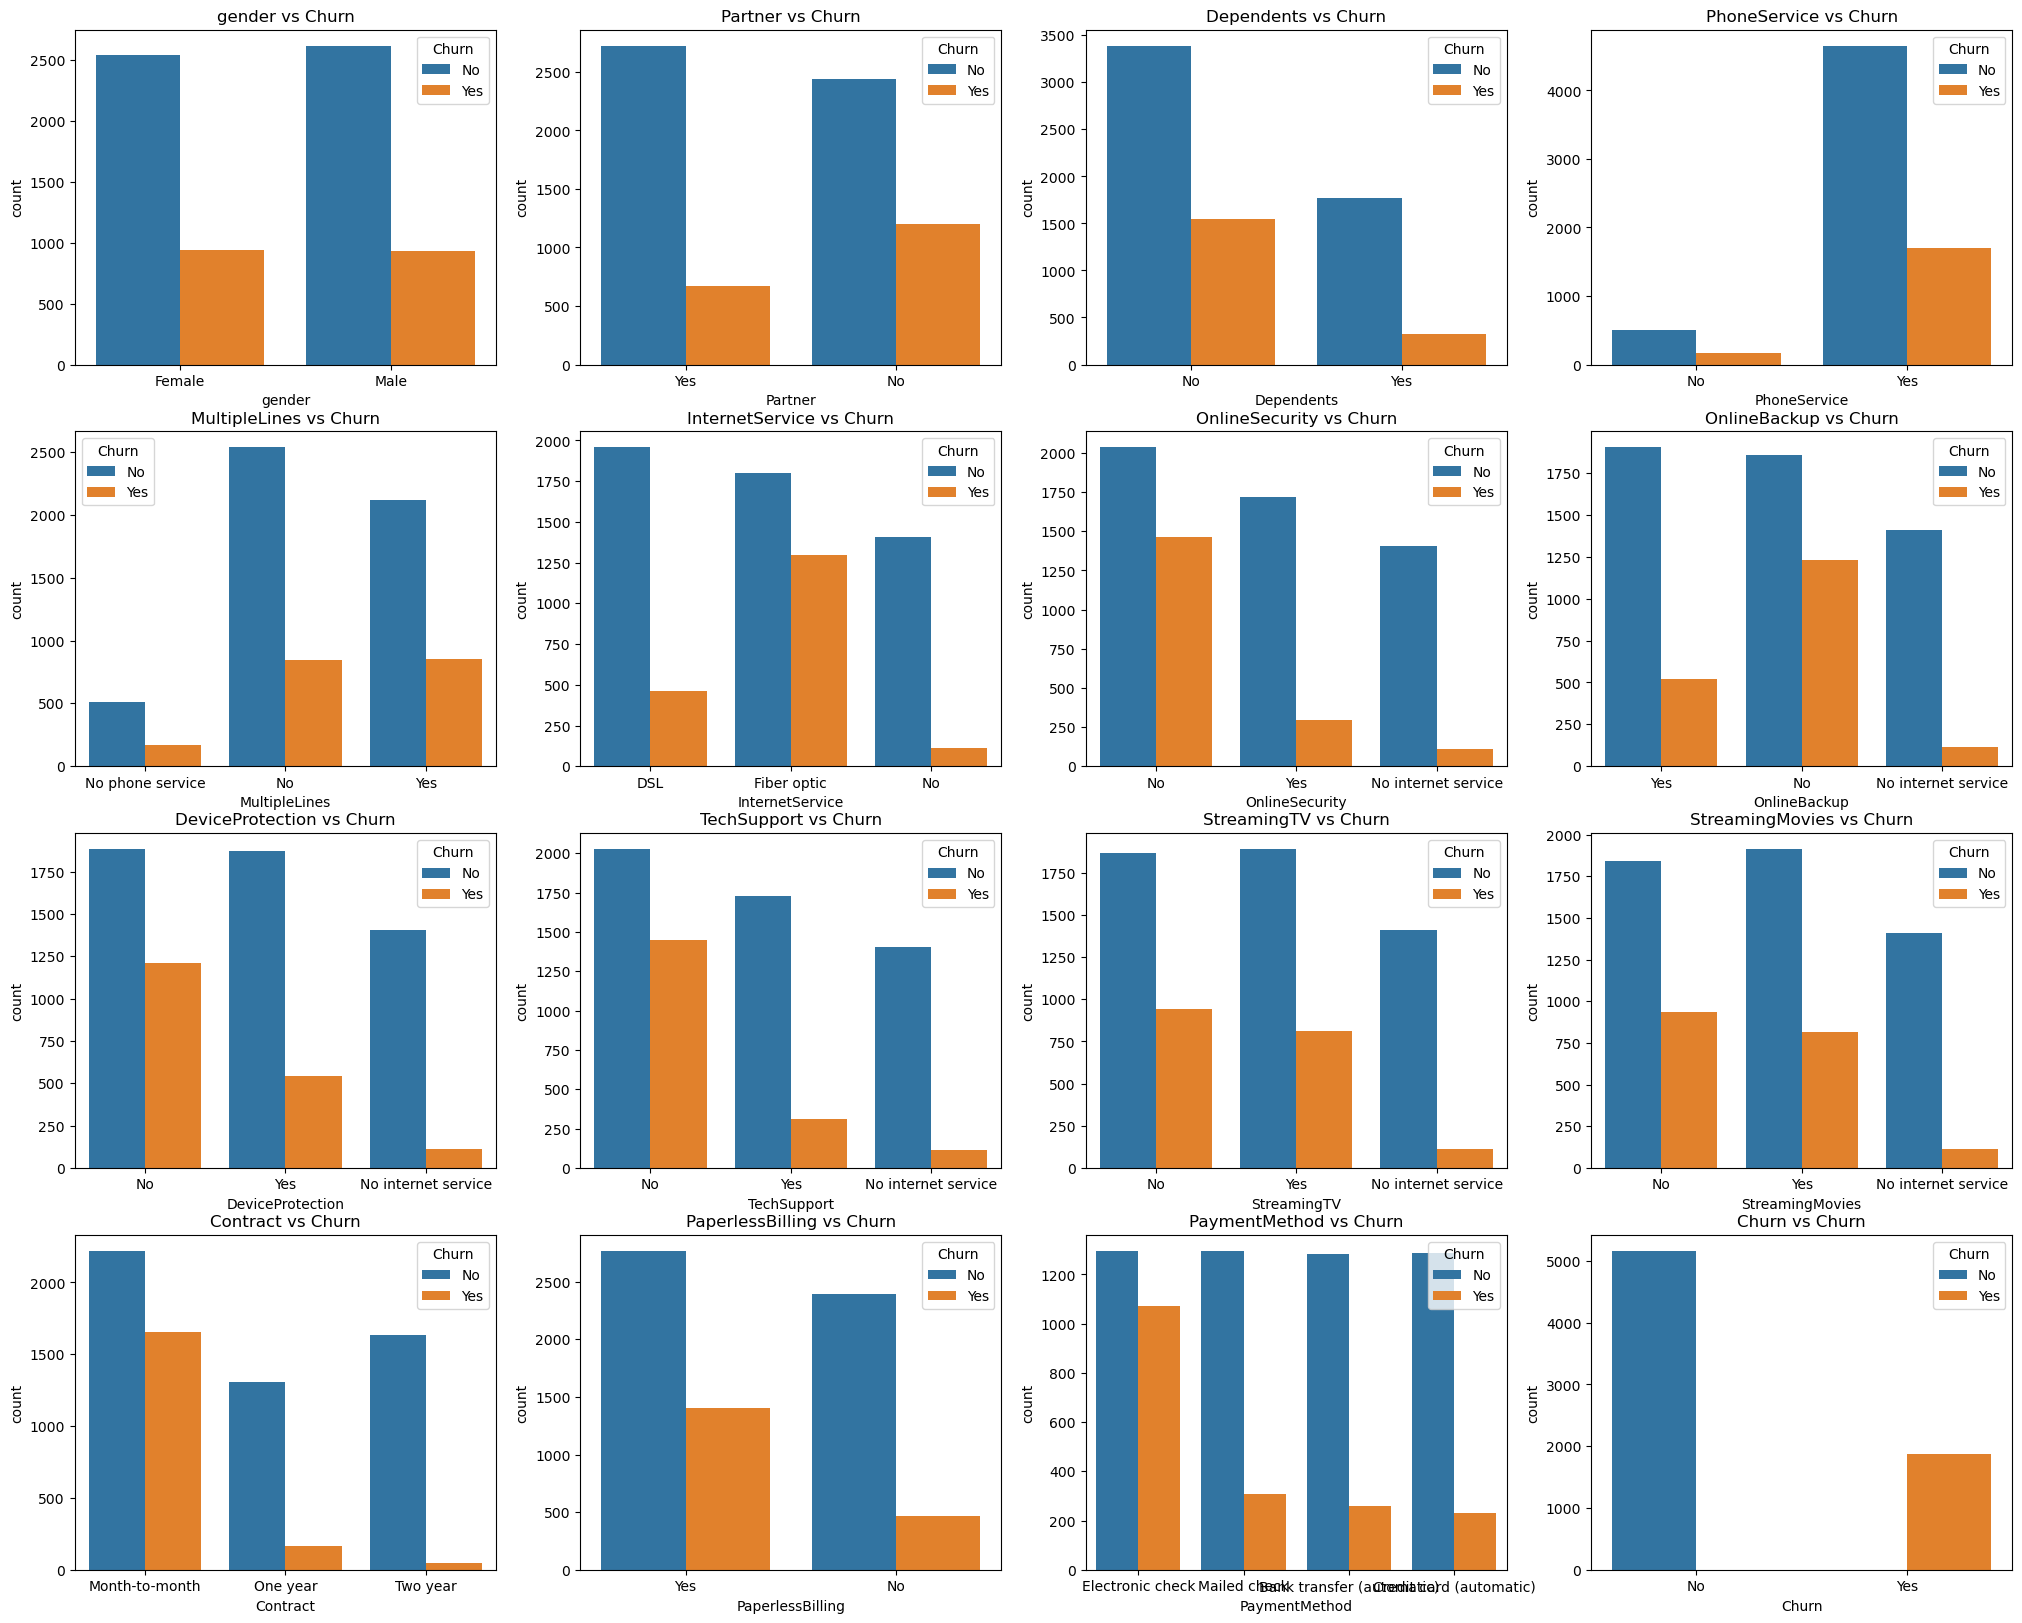

In [63]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize = (25,20))

position = axes.flatten()

for index, feature in enumerate(categorical_df):
    sns.countplot(data = categorical_df, x  = feature, hue = df["Churn"], ax = position[index])
    position[index].set_title(f"{feature} vs Churn")

# Analysing the churn rate bivariate analysis

#### Demographic Factors
1. Gender: There seems to be a slight difference in churn rates between genders, with males potentially having a slightly lower churn rate.
2. Partner: Customers with partners tend to have a lower churn rate compared to those without.

3. Dependents: Having dependents appears to correlate with a lower churn rate.


##### Service-Related Factors
4. Phone Service: Customers with phone service have a significantly lower churn rate than those without.
5. Multiple Lines: Having multiple lines does not seem to have a strong impact on churn.
6. Internet Service: Customers with fiber optic internet service have a lower churn rate compared to those with DSL or no internet service.
7. Online Security: There's a noticeable difference in churn rates between customers with and without online security, with those having it showing a lower churn rate.

Text(0.5, 1.0, 'churned')

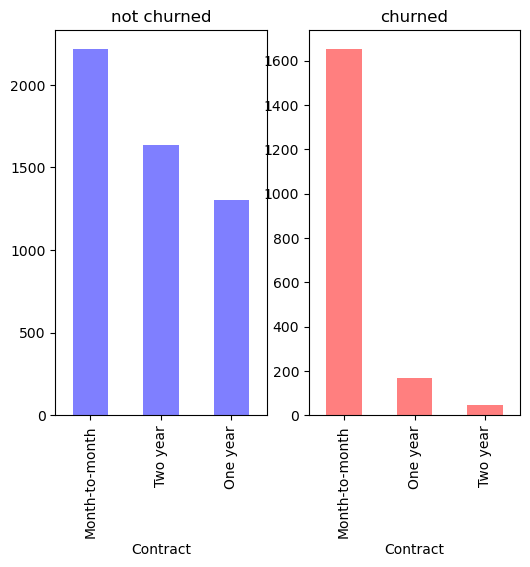

In [67]:
feature = 'Contract'
fig, ax = plt.subplots(nrows= 1, ncols=2, figsize = (6,5))
df[df.Churn  == "No"][feature].value_counts().plot(kind = 'bar',color ="blue", alpha = 0.5, ax = ax[0]).set_title('not churned')
df[df.Churn  == "Yes"][feature].value_counts().plot(kind = 'bar',color = "red", alpha = 0.5, ax = ax[1]).set_title('churned')

customers on month-month contracts are more likely to churn, followed by one-year and two-year contract respectively






Text(0.5, 1.0, 'churned')

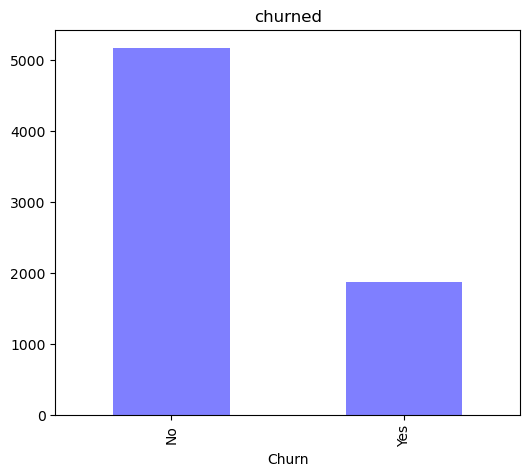

In [68]:
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize = (6,5))
df[target].value_counts().plot(kind = 'bar',color = "blue", alpha = 0.5, ax = ax).set_title('churned')

the target variable distribution shows we are having an imbalance data as we are having far more non_churned customers than churned. this could effect the model or cause bias as it could mostly predict non-churned customers.

testing different accuracy metrics could help.

C:\Users\User\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


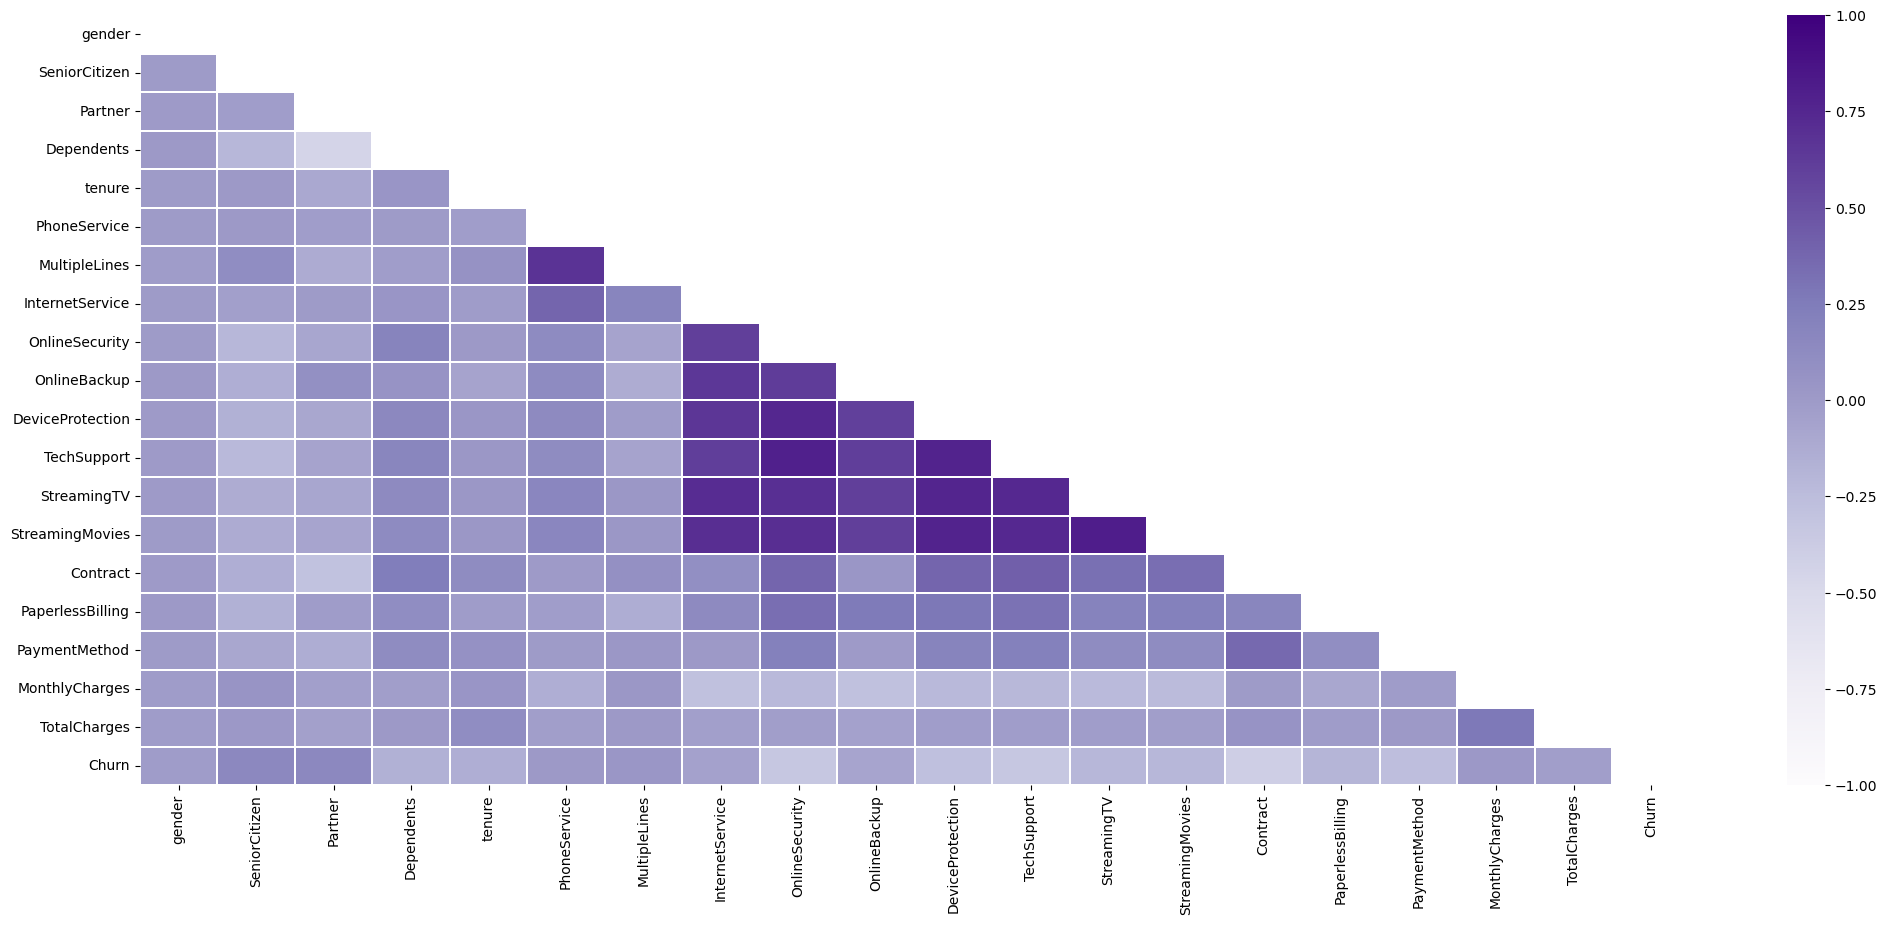

In [70]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='Purples', vmin=-1, vmax=1)

The color intensity represents the correlation coefficient, with darker shades indicating stronger correlations.
Key Observations:

Strong Negative Correlation with Churn:

MonthlyCharges and TotalCharges seem to have a strong negative correlation with Churn. This suggests that customers with higher monthly and total charges are less likely to churn. Contract also shows a negative correlation with Churn, implying that customers with longer contracts are less likely to leave. Potential Positive Correlations:

Some variables like SeniorCitizen, Dependents, and OnlineSecurity might have a slight positive correlation with Churn. However, these correlations appear weaker compared to the negative ones. Limited Correlations:

Many variables show minimal or no correlation with each other, indicating they might not have a strong influence on each other.

# Modelling

### Data Preprocessing

In [96]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


### Encoding categorical variables

In [92]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [104]:
def object_to_int(df):
    if df.dtype=='object':
        df = LabelEncoder().fit_transform(df)
    return df

In [105]:
df = df.apply(lambda x: object_to_int(x))

In [106]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## Spliting Data into train and test sets

In [115]:
from sklearn.model_selection import train_test_split

In [117]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [119]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6030,0,0,0,0,43,0,1,0,0,0,2,0,2,2,0,1,0,49.05,2076.20
3410,1,0,0,0,3,1,0,0,0,0,0,0,2,0,0,0,1,53.40,188.70
5483,0,0,1,0,55,1,2,1,0,0,2,0,0,0,0,1,2,77.75,4458.15
5524,1,0,1,1,45,1,0,0,2,0,0,2,0,0,2,0,0,54.65,2553.70
6337,0,0,1,1,55,1,2,1,2,0,0,0,2,2,1,0,3,100.90,5448.60


In [120]:
X.shape

(7032, 19)

In [121]:
y.shape

(7032,)

### scaling and standization of numeric varibles

In [122]:
from sklearn.preprocessing import MinMaxScaler

In [123]:
# Scale our training data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

# Machine learning, Evaluations and Predictions

### Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
# Initialize the model
model = LogisticRegression(random_state=42)

In [127]:
# Train the model
model.fit(X_train, y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [128]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [129]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model
report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.61      0.53      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
 [[908 125]
 [176 198]]


<Axes: >

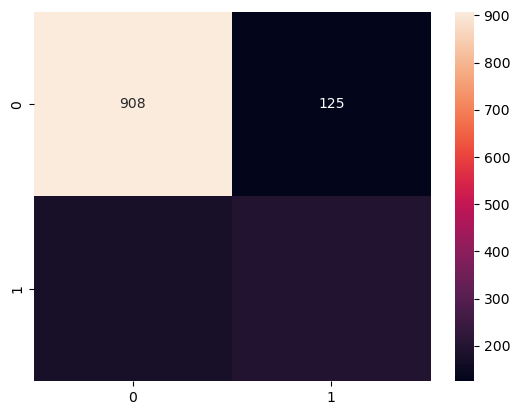

In [130]:
sns.heatmap(matrix, annot=True, fmt='2g')

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.62      0.74      1033
           1       0.44      0.84      0.58       374

    accuracy                           0.68      1407
   macro avg       0.68      0.73      0.66      1407
weighted avg       0.79      0.68      0.70      1407

Confusion Matrix:
 [[640 393]
 [ 60 314]]


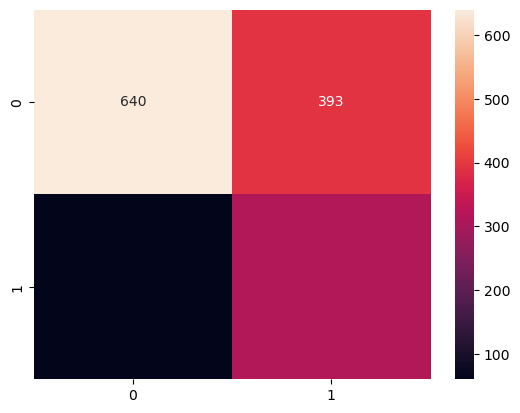

<-- SGD Classifiers -->
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85      1033
           1       0.60      0.40      0.48       374

    accuracy                           0.77      1407
   macro avg       0.70      0.65      0.67      1407
weighted avg       0.75      0.77      0.75      1407

Confusion Matrix:
 [[932 101]
 [223 151]]


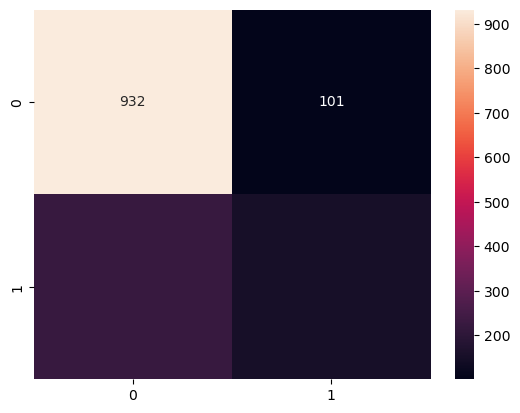

<-- Decision Tree -->
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1033
           1       0.48      0.50      0.49       374

    accuracy                           0.73      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.73      0.73      1407

Confusion Matrix:
 [[835 198]
 [188 186]]


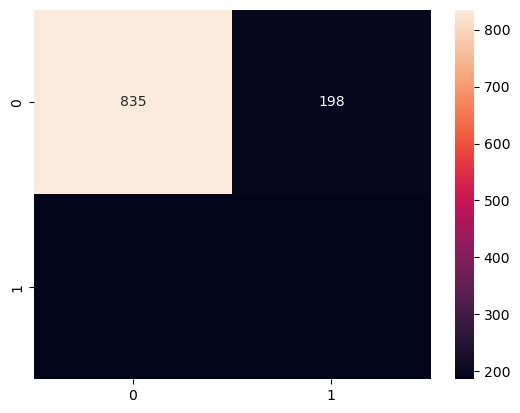

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.65      0.45      0.53       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
 [[943  90]
 [206 168]]


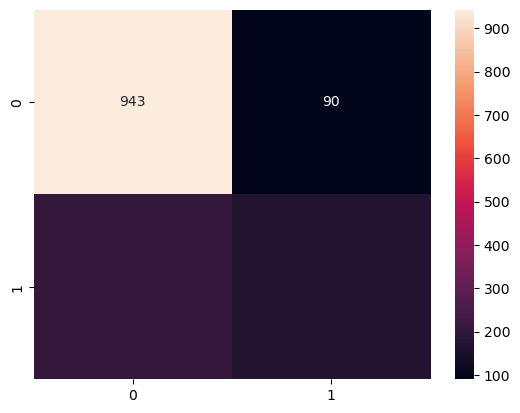

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


class_weights = {0: 1, 1: 4} 

# Initialize and train the models
classifiers = [[LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
               [SGDClassifier(random_state=42, class_weight=class_weights), 'SGD Classifiers'],
               [DecisionTreeClassifier(random_state=42, class_weight=class_weights), 'Decision Tree'],
               [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
              ]

for classifier in classifiers:
    print(f"<-- {classifier[1]} -->")
    model_name = classifier[1]
    model = classifier[0]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", matrix)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()

### Confusion matrix with scaled data

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.61      0.74      1033
           1       0.45      0.87      0.59       374

    accuracy                           0.68      1407
   macro avg       0.69      0.74      0.66      1407
weighted avg       0.80      0.68      0.70      1407

Confusion Matrix:
 [[632 401]
 [ 50 324]]


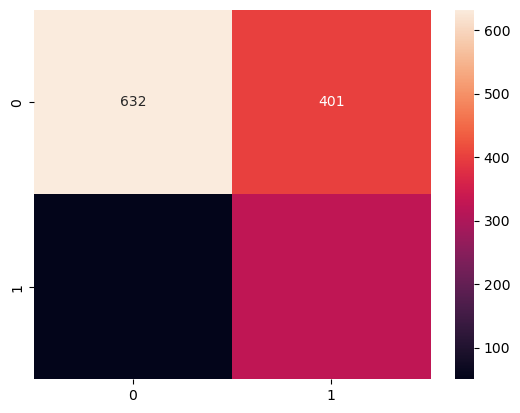

<-- SGD Classifiers -->
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.57      0.71      1033
           1       0.43      0.88      0.57       374

    accuracy                           0.65      1407
   macro avg       0.68      0.73      0.64      1407
weighted avg       0.80      0.65      0.67      1407

Confusion Matrix:
 [[589 444]
 [ 44 330]]


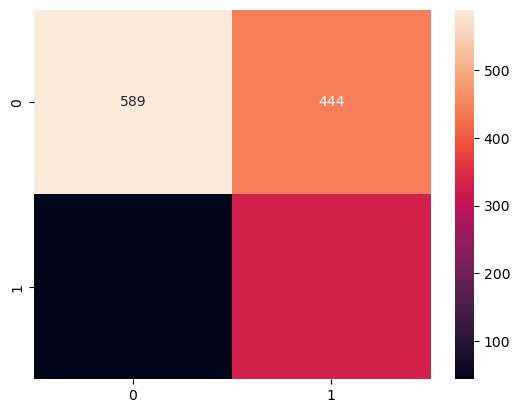

<-- Decision Tree -->
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1033
           1       0.49      0.50      0.49       374

    accuracy                           0.73      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.73      0.73      1407

Confusion Matrix:
 [[836 197]
 [188 186]]


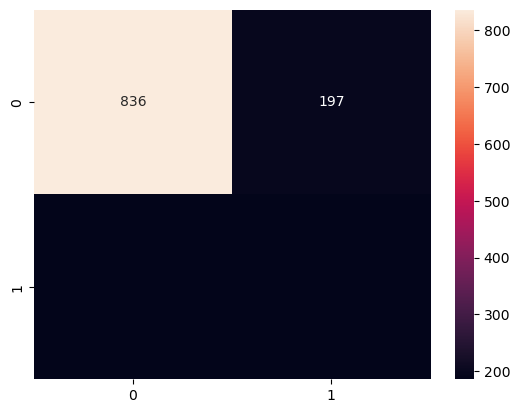

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.65      0.45      0.53       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
 [[943  90]
 [206 168]]


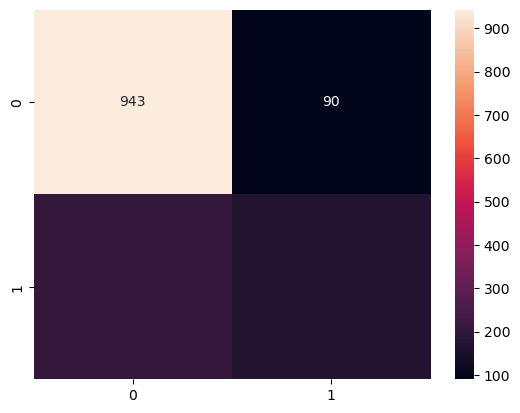

In [132]:
class_weights = {0: 1, 1: 4} 

# Initialize and train the models
classifiers = [[LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
               [SGDClassifier(random_state=42, class_weight=class_weights), 'SGD Classifiers'],
               [DecisionTreeClassifier(random_state=42, class_weight=class_weights), 'Decision Tree'],
               [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
              ]

for classifier in classifiers:
    print(f"<-- {classifier[1]} -->")
    model_name = classifier[1]
    model = classifier[0]
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", matrix)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.show()

# Conclusiion

Random Forest from our analysis appears to be the best model in accurately detecting customers that will churn with an accuray of: Class 1: Precision: 86%, Recall: 61%, F1-score: 53% 

Customer churn is definitely bad to a firm ’s profitability. Various strategies can be implemented to eliminate customer churn. The best way to avoid customer churn is for a company to truly know its customers. This includes identifying customers who are at risk of churning and working to improve their satisfaction. Improving customer service is, of course, at the top of the priority for tackling this issue. Building customer loyalty through relevant experiences and specialized service is another strategy to reduce customer churn. Some firms survey customers who have already churned to understand their reasons for leaving in order to adopt a proactive approach to avoiding future customer churn.